# DSA Final Project: Analyzing Angela Merkel's Speeches Using NLP

## Step 1: Setup

1.1 Load packages

In [2]:
# Loading pyLDAvis and pandas at the same has caused some trouble for us. We need to install both modules individually and then re-start runtime respectively.

!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 28.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 35.5 MB/s 
     |████████████████████████████████| 15.7 MB 36.5 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=154521450b3bf615908b1903e9447c2ecf7fcfe11ad4406b9d79d1baffd9fc6a
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take i

In [1]:
!pip install pandas==1.3.1

     |████████████████████████████████| 11.5 MB 26.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.


In [2]:
# Import re, numpy and panda for data wrangling
import re
import numpy as np
import pandas as pd
from pprint import pprint
from pandas import DataFrame
import tqdm

# Import NLTK and spacy for pre-processing text data
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
import en_core_web_sm

# Import Gensim for topic modeling
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import gensim.test.utils 

# Import plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1.2 Import data set

In [3]:
# Load Data
df = pd.read_csv("https://raw.githubusercontent.com/f-winkler/DSA_2021_FinalProject_Merkel/main/Merkel_english_speeches.csv")

# Explore data set
len(df)
df.shape
print(df.head())

   Unnamed: 0    doc_id  ... length language
0           1   doc7211  ...   3683       en
1           2  doc73851  ...   1735       en
2           3  doc73861  ...   2774       en
3           4  doc73841  ...   2348       en
4           5  doc73831  ...    894       en

[5 rows x 9 columns]


## Step 2: Pre-Processing Data

2.1 Prepare stopwords

In [4]:
# Set up our stopwords vector from NLTK
stop_words = stopwords.words('english')

# Add stopwords that we don't want to include in our topic modeling (through try and error, e.g. country was part of every topic and thus unimportant)
stop_words.extend(['want', 'must', 'also', 'need', 'many', 'make', 'take', 'takes', 'took', 'taken', 'say', 'see', 'would', 'well', 'country', 'countries', 'countrys', 'year', 'use', 'people', 'today'])

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

2.2 Tokenize words and remove punctuation

In [5]:
# Tokenize each sentence into a list of words, removing punctuations 
# Use Gensim's simple_preprocess() function and set deacc=True to remove punctuations

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df['text']))

print(data_words[:1])

[['excellencies', 'ladies', 'and', 'gentlemen', 'it', 'gives', 'me', 'great', 'pleasure', 'to', 'bid', 'you', 'welcome', 'to', 'the', 'federal', 'chancellery', 'for', 'the', 'traditional', 'new', 'years', 'reception', 'say', 'this', 'also', 'on', 'behalf', 'of', 'the', 'federal', 'foreign', 'office', 'and', 'minister', 'of', 'state', 'cornelia', 'pieper', 'regrettably', 'tonights', 'reception', 'is', 'overshadowed', 'by', 'terrible', 'news', 'from', 'moscow', 'this', 'afternoon', 'several', 'people', 'died', 'as', 'result', 'of', 'cowardly', 'attack', 'on', 'domodedovo', 'international', 'airport', 'in', 'moscow', 'the', 'federal', 'government', 'condemns', 'that', 'attack', 'in', 'the', 'strongest', 'possible', 'terms', 'we', 'wish', 'to', 'express', 'our', 'condolences', 'to', 'the', 'families', 'of', 'those', 'who', 'are', 'wounded', 'or', 'have', 'died', 'naturally', 'we', 'will', 'offer', 'the', 'russian', 'government', 'assistance', 'in', 'their', 'investigations', 'have', 'alrea

2.3 Create bigram and trigram models

In [6]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['excellencies_ladies', 'and', 'gentlemen', 'it', 'gives', 'me', 'great', 'pleasure', 'to', 'bid', 'you', 'welcome', 'to', 'the', 'federal_chancellery', 'for', 'the', 'traditional', 'new', 'years', 'reception', 'say', 'this', 'also', 'on', 'behalf', 'of', 'the', 'federal', 'foreign', 'office', 'and', 'minister', 'of', 'state', 'cornelia', 'pieper', 'regrettably', 'tonights', 'reception', 'is', 'overshadowed', 'by', 'terrible', 'news', 'from', 'moscow', 'this', 'afternoon', 'several', 'people', 'died', 'as', 'result', 'of', 'cowardly', 'attack', 'on', 'domodedovo', 'international', 'airport', 'in', 'moscow', 'the', 'federal_government', 'condemns', 'that', 'attack', 'in', 'the', 'strongest', 'possible', 'terms', 'we', 'wish', 'to', 'express', 'our', 'condolences', 'to', 'the', 'families', 'of', 'those', 'who', 'are', 'wounded', 'or', 'have', 'died', 'naturally', 'we', 'will', 'offer', 'the', 'russian', 'government', 'assistance', 'in', 'their', 'investigations', 'have', 'already', 'comm

2.4 Remove stopwords, make bigrams and lemmatize words

In [7]:
# Define functions for stopwords, bigrams, trigrams and lemmatization

# Remove stopwords
def remove_stopwords(texts):
    return[[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Make bigrams and trigrams
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Lemmatize (turn words into their lemmas)
def lemmatization(texts, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [8]:
# Run the functions sequentially

# Remove stop words
data_words_nostops = remove_stopwords(data_words)

# Form bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = en_core_web_sm.load(disable = ['parser', 'ner'])

# Run lemmatization keeping only noun, adj, vb, adv
data_lemma = lemmatization(data_words_bigrams, 
                           allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


print(data_lemma[:1])

[['give', 'great', 'pleasure', 'bid', 'welcome', 'traditional', 'new', 'year', 'reception', 'behalf', 'pieper', 'regrettably', 'tonight', 'reception', 'overshadow', 'terrible', 'news', 'afternoon', 'several', 'die', 'result', 'cowardly', 'attack', 'condemn', 'attack', 'strong', 'possible', 'term', 'wish', 'express', 'condolence', 'family', 'wound', 'die', 'naturally', 'offer', 'russian', 'government', 'assistance', 'investigation', 'already', 'communicate', 'sympathy', 'russian', 'lady', 'gentleman', 'excellency', 'allow', 'opportunity', 'reception', 'simply', 'express', 'thank', 'thank', 'different', 'activity', 'build', 'bridge', 'thank', 'daily', 'image', 'bring', 'home', 'culture', 'close', 'result', 'confidence', 'strengthen', 'mutual', 'understanding', 'improve', 'partnership', 'fill', 'life', 'friendship', 'develop', 'precondition', 'healthy', 'cooperation', 'cooperation', 'increase', 'importance', 'call', 'globalization', 'reflect', 'fact', 'draw', 'closer', 'together', 'confli

## Step 3: Topic Modeling

### Topic Modeler 1: Latent Dirichlet Allocation (LDA)

Still to do: 

*   Define topics, analyze, visualize...
*   Evaluate LDA model

3.1 Create the Dictionary and Corpus needed for LDA Modeling

In [9]:
# Create a dictionary (id2word) and a corpus which are the two main inputs to the LDA topic model

# Create Dictionary
id2word = corpora.Dictionary(data_lemma)

# Create Corpus
texts = data_lemma

# Create a document term matrix (term document frequency)
corpus = [id2word.doc2bow(text) for text in texts]

# View the corpus
print(corpus[:1])

# Gensim creates a unique id for each word in the document. The produced corpus is a mapping of (word_id, word_frequency).

# If you want to see what word a given id corresponds to, pass the id as a key to the dictionary.
id2word[10]

# Or, you can see a human-readable form of the corpus itself (term-frequency):
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[(0, 2), (1, 2), (2, 11), (3, 1), (4, 6), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 4), (15, 2), (16, 4), (17, 2), (18, 2), (19, 2), (20, 3), (21, 5), (22, 1), (23, 4), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 6), (31, 8), (32, 6), (33, 1), (34, 1), (35, 2), (36, 1), (37, 5), (38, 1), (39, 2), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 4), (51, 1), (52, 3), (53, 7), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 3), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 5), (69, 1), (70, 1), (71, 1), (72, 3), (73, 1), (74, 1), (75, 2), (76, 1), (77, 2), (78, 1), (79, 1), (80, 1), (81, 2), (82, 2), (83, 5), (84, 3), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 3), (92, 1), (93, 2), (94, 4), (95, 1), (96, 2), (97, 1), (98, 1), (99, 1), (100, 3), (101, 4), (102, 1), (103, 2), (104, 1), (105, 1), (106, 1), (107, 3), (108, 1), (109, 2), (110, 1

[[('able', 2),
  ('accept', 2),
  ('achieve', 11),
  ('achieved', 1),
  ('action', 6),
  ('active', 2),
  ('activity', 2),
  ('admire', 1),
  ('admit', 1),
  ('adopt', 1),
  ('advocate', 1),
  ('affect', 1),
  ('african', 2),
  ('afternoon', 1),
  ('agree', 4),
  ('ahead', 2),
  ('aid', 4),
  ('aim', 2),
  ('alliance', 2),
  ('allow', 2),
  ('alone', 3),
  ('already', 5),
  ('altogether', 1),
  ('always', 4),
  ('amount', 1),
  ('anchor', 1),
  ('announce', 1),
  ('annual', 1),
  ('apparent', 2),
  ('appeal', 1),
  ('apply', 6),
  ('approach', 8),
  ('area', 6),
  ('argument', 1),
  ('arise', 1),
  ('arm', 2),
  ('assist', 1),
  ('assistance', 5),
  ('assume', 1),
  ('attack', 2),
  ('attempt', 1),
  ('attend', 1),
  ('attention', 2),
  ('austerity', 1),
  ('awareness', 1),
  ('bank', 1),
  ('barrier', 1),
  ('base', 1),
  ('basic', 2),
  ('basis', 1),
  ('become', 4),
  ('begin', 1),
  ('behalf', 3),
  ('believe', 7),
  ('beneficial', 2),
  ('benefit', 1),
  ('bid', 1),
  ('breath', 1

3.2 Build the LDA model

In [10]:
# For now, we have everything required to run the LDA model.
# In addition to the corpus and dictionary, we need to provide the number of topics as well.
# Apart from that, alpha and eta are hyperparameters that affect sparsity of the topics. According to the Gensim docs, both defaults to 1.0/num_topics prior.
# chunksize is the number of documents to be used in each training chunk. update_every determines how often the model parameters should be updated and passes is the total number of training passes.

lda_model = gensim.models.LdaMulticore(corpus = corpus,
                                       id2word = id2word,
                                       num_topics = 5,
                                       random_state = 42,                                        
                                       chunksize = 100,
                                       passes = 10,                                   
                                       per_word_topics=True,
                                       minimum_probability = 0)


In [11]:
# Once the LDA model is trained, we can save and load the model object

# Save model in pickle format to working directory
lda_model.save("lda_merkel.pkl")

# Load model back into your workspace from working directory
lda_model = gensim.models.LdaModel.load("lda_merkel.pkl")

3.3 View the topics in the LDA model

In [12]:
# The LDA model is built with 5 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.
# We can see the keywords for each topic and the weightage(importance) of each keyword using lda_model.print_topics() as shown next.

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"work" + 0.006*"health" + 0.006*"development" + 0.006*"world" + '
  '0.005*"issue" + 0.005*"together" + 0.005*"time" + 0.005*"global" + '
  '0.005*"important" + 0.004*"international"'),
 (1,
  '0.009*"development" + 0.008*"global" + 0.006*"work" + 0.006*"climate" + '
  '0.006*"world" + 0.006*"important" + 0.005*"investment" + 0.005*"know" + '
  '0.005*"state" + 0.005*"develop"'),
 (2,
  '0.008*"world" + 0.007*"year" + 0.006*"time" + 0.005*"work" + 0.005*"mean" + '
  '0.005*"development" + 0.005*"become" + 0.005*"much" + 0.005*"percent" + '
  '0.004*"fact"'),
 (3,
  '0.009*"work" + 0.007*"time" + 0.006*"world" + 0.005*"german" + '
  '0.004*"woman" + 0.004*"year" + 0.004*"know" + 0.004*"important" + '
  '0.004*"good" + 0.004*"even"'),
 (4,
  '0.007*"religious" + 0.006*"responsibility" + 0.006*"freedom" + '
  '0.006*"reformation" + 0.005*"important" + 0.005*"place" + 0.005*"learn" + '
  '0.004*"murder" + 0.004*"remember" + 0.004*"education"')]


3.4 Identify topics from LDA keywords (human decision)

3.5 Compute model perplexity and coherence score

In [13]:
# Model perplexity and topic coherence provide a measure to judge how good a given topic model is.

# Compute model perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemma, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Perplexity:  -7.508314880176281

Coherence Score:  0.2758717102845445


3.6 Visualize the topics-keywords from LDA model

In [14]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

# Each bubble on the left-hand side plot of pyLDAvis package’s interactive chart represents a topic. The larger the bubble, the more prevalent is that topic.
# A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.
# A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.
# If you move the cursor over one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.063940  0.014501       1        1  31.330716
0      0.049013  0.030632       2        1  26.963354
3      0.013981  0.040069       3        1  24.819071
2      0.024694 -0.090220       4        1  13.308291
4     -0.151627  0.005018       5        1   3.578567, topic_info=               Term        Freq       Total Category  logprob  loglift
493  responsibility  100.000000  100.000000  Default  30.0000  30.0000
253         freedom   61.000000   61.000000  Default  29.0000  29.0000
428           place  126.000000  126.000000  Default  28.0000  28.0000
330           learn   78.000000   78.000000  Default  27.0000  27.0000
723          health  102.000000  102.000000  Default  26.0000  26.0000
..              ...         ...         ...      ...      ...      ...
334            life    4.667300   80.947999   Topic5  -5.9190   0.4770
484          remain    4.668729   82.318072   Topic5  -5.9187   0.4605
150             day    4.669128  108.100255   Topic5  -5.9187   0.1881
582           thank    4.671772  147.975288   Topic5  -5.9181  -0.1253
633           world    4.740974  289.388734   Topic5  -5.9034  -0.7813

[428 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0         1  0.285824  able
0         2  0.285824  able
0         3  0.308999  able
0         4  0.077250  able
0         5  0.030900  able
...     ...       ...   ...
638       1  0.286238  year
638       2  0.219790  year
638       3  0.255569  year
638       4  0.219790  year
638       5  0.015334  year

[902 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3, 5])

3.7 Model coherence analysis (finding the optimal LDA model specification)

In [15]:
# Our approach to finding the optimal number of topics is to build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.
# The compute_coherence_values() (see below) trains multiple LDA models and provides the models and their corresponding coherence scores.

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [16]:
# Can take a long time to run
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemma, start=1, limit=10, step=1)

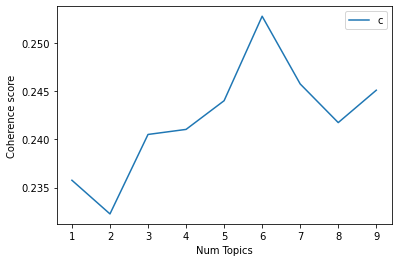

In [17]:
# Show graph
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [18]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.2358
Num Topics = 2  has Coherence Value of 0.2323
Num Topics = 3  has Coherence Value of 0.2405
Num Topics = 4  has Coherence Value of 0.241
Num Topics = 5  has Coherence Value of 0.244
Num Topics = 6  has Coherence Value of 0.2528
Num Topics = 7  has Coherence Value of 0.2458
Num Topics = 8  has Coherence Value of 0.2417
Num Topics = 9  has Coherence Value of 0.2451


##Topic modeler 2: Non-negative Matrix Factorization (NMF)

Still to do:
*   Fine-tune count vectorization: lemmatize if possible
*   Find the optimal number of topics for the NMF model



In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from nltk.probability import FreqDist
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.cluster import DBSCAN
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

import seaborn as sns
# %matplotlib inline

3.1 Count vectorization

In [20]:
# This optional step creates a sorted list of words and their frequency in all speeches combined (document term matrix).

freqmatrix = [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
fr = freqmatrix[0]

def getKey(item):
    return item[1]

sorted(fr, key = getKey, reverse=True)

[('development', 14),
 ('achieve', 11),
 ('economic', 11),
 ('international', 11),
 ('wish', 10),
 ('cooperation', 9),
 ('naturally', 9),
 ('new', 9),
 ('stability', 9),
 ('approach', 8),
 ('crisis', 8),
 ('establish', 8),
 ('security', 8),
 ('successful', 8),
 ('view', 8),
 ('believe', 7),
 ('fact', 7),
 ('good', 7),
 ('great', 7),
 ('growth', 7),
 ('however', 7),
 ('important', 7),
 ('know', 7),
 ('mean', 7),
 ('seek', 7),
 ('action', 6),
 ('apply', 6),
 ('area', 6),
 ('ensure', 6),
 ('experience', 6),
 ('financial', 6),
 ('long', 6),
 ('place', 6),
 ('point', 6),
 ('progress', 6),
 ('provide', 6),
 ('remain', 6),
 ('support', 6),
 ('work', 6),
 ('world', 6),
 ('already', 5),
 ('assistance', 5),
 ('can', 5),
 ('close', 5),
 ('continue', 5),
 ('government', 5),
 ('intend', 5),
 ('level', 5),
 ('major', 5),
 ('make', 5),
 ('other', 5),
 ('result', 5),
 ('still', 5),
 ('talk', 5),
 ('way', 5),
 ('year', 5),
 ('agree', 4),
 ('aid', 4),
 ('always', 4),
 ('become', 4),
 ('common', 4),
 ('c

In [21]:
# This is the code for the actual count vectorization (this is essentially a more sophisticated way of tokenizing text into words)

def remove_numbers(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

cv = CountVectorizer(stop_words=stop_words, max_df=1.0, min_df = 1, ngram_range = (1, 1), preprocessor = remove_numbers)
  # Here is where the fine-tuning happens (because it decides which words are kept in the NMF model). More arguments: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
  # "stop_words" argument removes our pre-defined stop words
  # "max_df" ignores terms that have a document frequency higher than this threshold (in this case, I use 1.0, i.e. 100%, that means we don't remove any words; but this could be lowered to remove very frequent words). Can either be a percentage value (between 0.0 and 1.0) or an integer as the number of frequency of a word
  # "min_df" ignores terms that have a document frequency lower than this threshold (in this case, I use 1, so no words are removed; but this could have a percentage value between 0.0 and 1.0 or an integer in terms of the frequency of a word)
  # "ngram_range" of (1, 2) would mean that unigrams and bigrams (words that frequenty occur together, e.g. European Union) are included as single tokens. For now, we only include unigrams.

doc_to_word = cv.fit_transform(df.text) # Adds the "text" column of the dataframe as an argument
X_t_cv  = cv.transform(df.text) # Adds the "text" column of the dataframe as an argument


3.2 Run the NMF model

In [22]:
nmf_model = NMF(10) # Choose number of topics here
doc_topic = nmf_model.fit_transform(doc_to_word)

topic_word_nmf = pd.DataFrame(nmf_model.components_.round(3), 
             index = ["topic_1","topic_2", "topic_3","topic_4", "topic_5", 
                     "topic_6","topic_7", "topic_8","topic_9", "topic_10"
                     ],
             columns = cv.get_feature_names())
topic_word_nmf

# The table output shows all individual words as separate columns and their correlation with each of the topics.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aachen,ababa,abandon,abandoning,abandonment,abbreviated,abdul,abdullah,abe,aberrations,abhorrent,abide,ability,abiy,ablaze,able,abolition,abominable,abroad,absolute,absolutely,absorbing,abstract,absurdity,abundance,abundantly,abused,abysmal,abyss,academia,academic,academies,academy,accelerate,accelerated,accelerating,accept,acceptable,acceptance,accepted,...,wrote,wto,wunderbar,württemberg,władysław,xenophobic,xi,yad,yar,yardstick,yearning,years,yemen,yes,yesterday,yesterdays,yet,yield,yielded,yields,yom,york,youll,young,youre,youth,youths,youve,yugoslav,yücel,yücels,zaev,zaldívar,zealand,zero,zest,zhongli,zone,zoran,élysée
topic_1,0.083,0.001,0.000,0.053,0.004,0.000,0.087,0.003,0.017,0.000,0.000,0.000,0.083,0.018,0.000,0.792,0.000,0.000,0.000,0.011,0.024,0.003,0.000,0.000,0.000,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.011,0.043,...,0.000,0.000,0.014,0.000,0.000,0.014,0.087,0.000,0.000,0.000,0.000,1.367,0.142,0.157,0.281,0.006,0.246,0.000,0.087,0.000,0.000,0.000,0.000,0.048,0.000,0.000,0.005,0.000,0.023,0.000,0.000,0.119,0.000,0.000,0.000,0.000,0.000,0.000,0.094,0.069
topic_2,0.000,0.006,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.520,0.000,0.000,0.011,0.019,0.096,0.018,0.000,0.000,0.000,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.011,0.034,0.035,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.812,0.000,0.026,0.020,0.007,0.124,0.000,0.000,0.032,0.000,0.080,0.001,0.042,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.032,0.000,0.026,0.000,0.000,0.011,0.000,0.000
topic_3,0.294,0.013,0.000,0.037,0.000,0.000,0.000,0.000,0.001,0.008,0.000,0.056,0.131,0.000,0.000,0.844,0.000,0.000,0.030,0.013,0.048,0.002,0.000,0.008,0.000,0.000,0.000,0.000,0.056,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.159,0.000,0.012,0.034,...,0.004,0.000,0.007,0.056,0.000,0.007,0.000,0.000,0.000,0.000,0.008,0.740,0.000,0.118,0.000,0.000,0.378,0.000,0.000,0.000,0.000,0.000,0.000,0.076,0.000,0.060,0.002,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.051
topic_4,0.009,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.013,0.000,0.000,0.000,0.000,0.000,0.000,0.324,0.000,0.000,0.086,0.011,0.129,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.016,0.000,0.000,0.019,...,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.094,0.000,0.000,0.000,2.177,0.001,0.012,0.094,0.012,0.429,0.001,0.000,0.000,0.000,0.000,0.000,0.123,0.000,0.000,0.002,0.094,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.099,0.000,0.011
topic_5,0.018,0.009,0.000,0.000,0.006,0.000,0.000,0.002,0.000,0.009,0.032,0.000,0.000,0.000,0.048,0.384,0.000,0.048,0.058,0.049,0.000,0.001,0.048,0.009,0.043,0.008,0.088,0.000,0.000,0.002,0.013,0.000,0.029,0.000,0.000,0.048,0.205,0.046,0.019,0.027,...,0.128,0.007,0.020,0.000,0.032,0.020,0.000,0.000,0.032,0.000,0.009,0.769,0.036,0.000,0.012,0.000,0.106,0.000,0.000,0.000,0.063,0.000,0.000,0.202,0.000,0.122,0.009,0.000,0.002,0.000,0.000,0.001,0.002,0.009,0.000,0.032,0.006,0.000,0.000,0.037
topic_6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.008,0.000,0.000,0.000,0.112,0.000,0.000,0.031,0.000,0.000,0.000,0.014,0.020,0.000,0.000,0.000,0.006,0.000,0.000,0.015,0.000,0.104,0.000,0.000,0.003,0.000,0.102,0.000,0.000,0.000,0.013,0.038,...,0.000,0.000,0.002,0.000,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.702,0.000,0.000,0.000,0.005,0.120,0.003,0.000,0.000,0.000,0.005,0.005,0.026,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000
topic_7,0.005,0.001,0.000,0.000,0.000,0.000,0.000,0.001,0.005,0.000,0.000,0.000,0.077,0.000,0.000,0.246,0.083,0.000,0.073,0.007,0.090,0.000,0.000,0.000,0.000,0.000,0.077,0.001,0.000,0.002,0.006,0.000,0.002,0.000,0.000,0.000,0.091,0.000,0.008,0.000,...,0.000,0.000,0.007,0.000,0.000,0.007,0.000,0.000,0.000,0.000,0.000,0.611,0.029,0.000,0.010,0.006,0.248,0.000,0.000,0.000,0.000,0.000,0.000,0.022,0.000,0.002,0.012,0

3.3 Display topics from NMF and their keywords

In [23]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix +1)
        else:
            print("\nTopic: '",topic_names[ix + 1],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [24]:
display_topics(nmf_model, cv.get_feature_names(), 10)


Topic  1
us, nato, germany, security, united, union, russia, states, like, european

Topic  2
climate, germany, global, agreement, emissions, paris, protection, change, energy, us

Topic  3
europe, european, us, together, union, germany, emmanuel, common, macron, refugees

Topic  4
world, years, germany, much, means, percent, climate, transformation, europe, time

Topic  5
germany, jewish, us, state, federal, world, day, life, antisemitism, jews

Topic  6
internet, digital, global, freedom, one, world, us, berlin, new, way

Topic  7
labour, work, international, world, ilo, conditions, working, one, social, germany

Topic  8
european, uk, member, eu, negotiations, states, council, german, union, future

Topic  9
health, world, one, global, development, diseases, international, therefore, important, nations

Topic  10
development, africa, germany, german, economic, one, african, cooperation, important, work


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


3.4 Display distribution of topics across years

In [25]:
# Add a new column for the year of the speech (only year, not the whole date)

df['date'] = pd.to_datetime(df['date']) # Converts "date" column to pandas datetime format
df['year'] = df['date'].dt.year # Creates new "year" column


In [26]:
doc_topic_nmf = pd.DataFrame(doc_topic.round(3),
                             index = df.year.astype(int), 
                             columns = ["topic_1","topic_2", "topic_3","topic_4", "topic_5", 
                     "topic_6","topic_7", "topic_8","topic_9", "topic_10"
                     ])
dtn = doc_topic_nmf.groupby(doc_topic_nmf.index).sum()
dtn.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
year,,,,,,,,,,
2011,1.646,0.298,0.763,0.000,0.692,0.000,0.000,0.000,0.193,4.881
2015,1.051,8.047,6.725,0.542,1.474,0.184,0.956,0.085,5.780,1.531
2016,1.953,8.940,2.939,0.189,2.890,0.372,2.547,1.149,2.012,7.851
2017,5.576,7.775,0.843,3.160,4.816,2.449,3.585,13.036,18.184,11.316
2018,4.488,5.473,15.635,3.293,7.172,1.145,4.116,3.318,4.256,12.436


3.5 Create heatmap to show the distribution of topics across years

Text(0.5, 1.0, 'Speech Topics Over The Years\n')

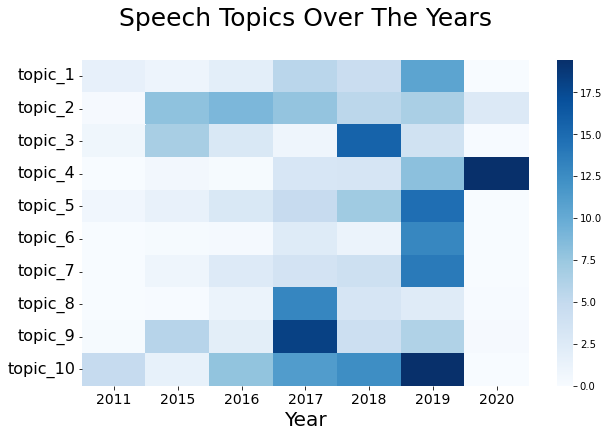

In [27]:
plt.figure(figsize = (10, 6))
sns.heatmap(dtn.T, annot=False, cbar=True, cmap="Blues")
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 16)
plt.title('Speech Topics Over The Years\n', fontsize=25)

## Step 4: Sentiment Analysis

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import sentiment_analyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [29]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [30]:
def sentiment_analysis_old(text):
  score = SentimentIntensityAnalyzer().polarity_scores(text)
  print(score)

The results give us numerical values for use of negative, neutral, and positive word choice. The compound value reflects the overall sentiment ranging from -1 being very negative and +1 being very positive.

In [31]:
# Show the polarity_scores of each speech 
for speech in df['text']:
  sentiment_analysis_old(speech)

{'neg': 0.039, 'neu': 0.785, 'pos': 0.177, 'compound': 1.0}
{'neg': 0.046, 'neu': 0.856, 'pos': 0.099, 'compound': 0.9972}
{'neg': 0.026, 'neu': 0.805, 'pos': 0.169, 'compound': 0.9999}
{'neg': 0.104, 'neu': 0.716, 'pos': 0.18, 'compound': 0.9996}
{'neg': 0.062, 'neu': 0.785, 'pos': 0.154, 'compound': 0.9979}
{'neg': 0.076, 'neu': 0.751, 'pos': 0.173, 'compound': 0.9998}
{'neg': 0.048, 'neu': 0.813, 'pos': 0.139, 'compound': 0.9962}
{'neg': 0.05, 'neu': 0.795, 'pos': 0.155, 'compound': 0.9974}
{'neg': 0.033, 'neu': 0.787, 'pos': 0.181, 'compound': 0.9998}
{'neg': 0.088, 'neu': 0.803, 'pos': 0.109, 'compound': 0.6899}
{'neg': 0.108, 'neu': 0.72, 'pos': 0.172, 'compound': 0.998}
{'neg': 0.012, 'neu': 0.772, 'pos': 0.216, 'compound': 1.0}
{'neg': 0.027, 'neu': 0.835, 'pos': 0.139, 'compound': 0.9999}
{'neg': 0.076, 'neu': 0.739, 'pos': 0.186, 'compound': 0.9999}
{'neg': 0.083, 'neu': 0.748, 'pos': 0.169, 'compound': 0.9998}
{'neg': 0.04, 'neu': 0.799, 'pos': 0.161, 'compound': 0.9999}
{'n

In [32]:
result = {'pos': 0, 'neg': 0, 'neu': 0}
for speech in df['text']:
    score = SentimentIntensityAnalyzer().polarity_scores(speech)
    if score['compound'] > 0.05:
        result['pos'] += 1
    elif score['compound'] < -0.05:
        result['neg'] += 1
    else:
       result['neu'] += 1

print(result)

{'pos': 56, 'neg': 1, 'neu': 0}
